In [1]:
import numpy as np
import matplotlib.pyplot as plt

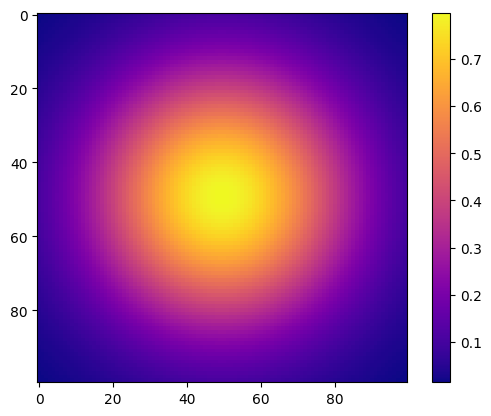

In [11]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
r = np.sqrt(x*x + y*y)
def gaussian(mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-((r-mu)**2)/(2*sigma**2))
    #return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(1/(2*sigma**2))((x-mu)**2 + (y-mu)**2))
plt.imshow(gaussian(0,0.5), cmap='plasma')
plt.colorbar()

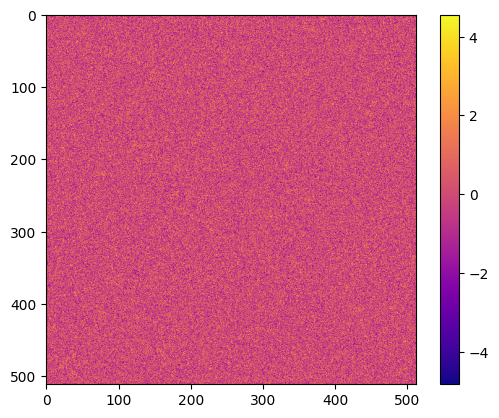

In [12]:
mu, sigma = 0, 1
gaussian_random = np.random.normal(mu, sigma, (512,512))
plt.imshow(gaussian_random, cmap='plasma')
plt.colorbar()

In [13]:
#white_noise = np.fft.fft2(gaussian(0,0.5))
white_noise = np.fft.fft2(gaussian_random)
k_array = np.fft.fftfreq(512)
k_x, k_y = np.meshgrid(k_array, k_array)
k = np.sqrt(k_x**2 + k_y**2)

/var/folders/j5/z7m5_tq17djdyt_9jzjz861m0000gn/T/ipykernel_59724/1565815003.py:2: RuntimeWarning: divide by zero encountered in power
  return np.power(k, -n)


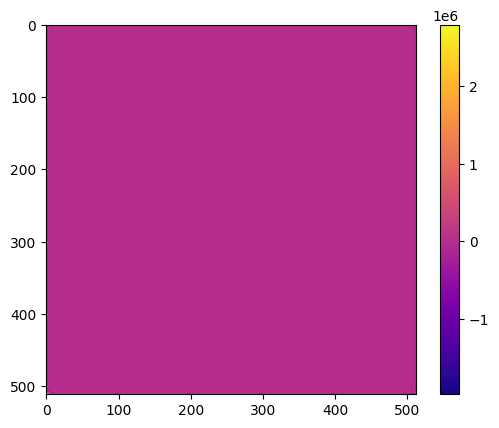

In [14]:

def P(n):
    return np.power(k, -n)
P1 = np.sqrt(P(3))
P1[0,0] = 0
power_spectrum = white_noise.real * P1
#plt.contourf(x, y, white_noise.real)
#plt.contourf(x, y, power_spectrum.real)
plt.imshow(power_spectrum.real, cmap='plasma')
plt.colorbar()

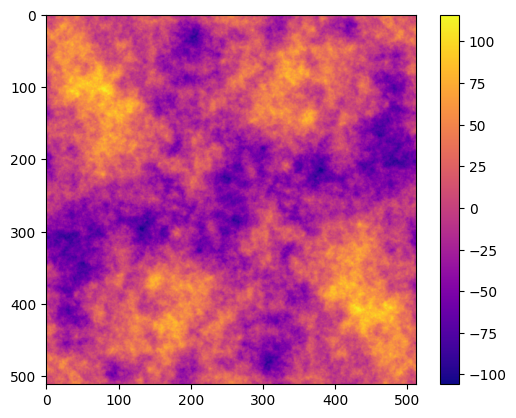

In [15]:
GRF = np.fft.ifft2(power_spectrum)
plt.imshow(GRF.real, cmap='plasma')
plt.colorbar()

## Using python module

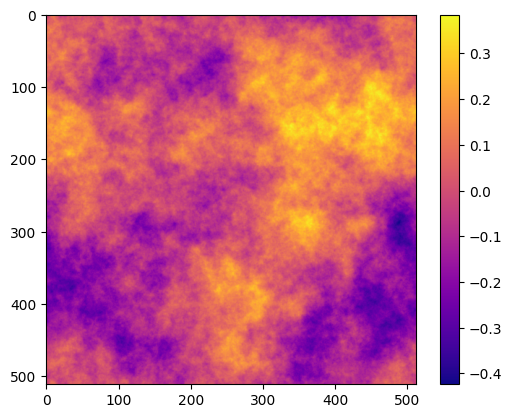

In [8]:
from FyeldGenerator import generate_field
import matplotlib.pyplot as plt
import numpy as np

# generates power-law power spectrum
def Pkgen(n):
    def Pk(k):
        return np.power(k, -n)

    return Pk


# Drawing samples from a normal distribution
def distrib(shape):
    a = np.random.normal(loc=0, scale=1, size=shape)
    b = np.random.normal(loc=0, scale=1, size=shape)
    return a + 1j * b


shape = (512, 512)

field = generate_field(distrib, Pkgen(3), shape)

plt.imshow(field, cmap="plasma")
plt.colorbar()

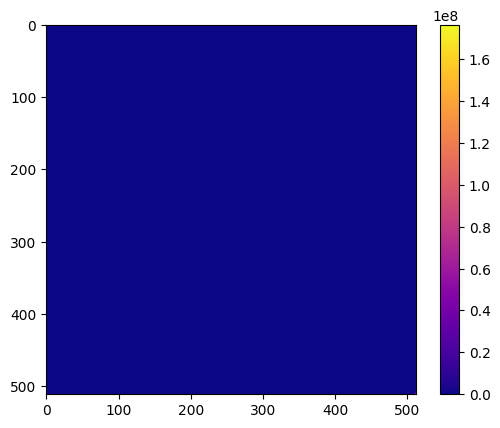

In [9]:
fft_field = np.fft.fft2(field)
fft_field_sq = abs(np.fft.fft2(field)**2)
plt.imshow(fft_field_sq, cmap ='plasma')
plt.colorbar()

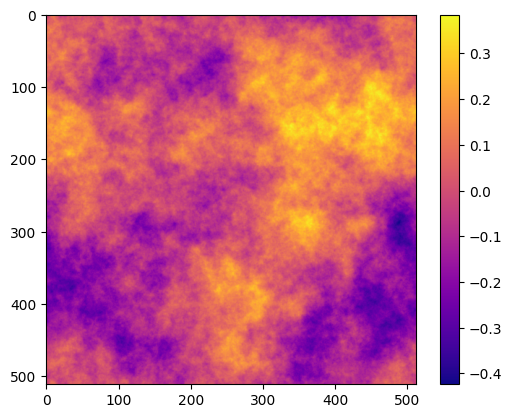

In [10]:
test = np.fft.ifft2(fft_field)
plt.imshow(test.real, cmap='plasma')
plt.colorbar()